In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
[i*3 for i in range(5)]

[0, 3, 6, 9, 12]

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')
print('credit_data shape: ', df.shape)
df.head(20
        )

credit_data shape:  (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


## EDA

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isna().mean()

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


With this summary statistics we can analyse the attribute person_age and person_emp_length and see that the maximum 144 and 123 could be an outliers because those represent age and years of employment.

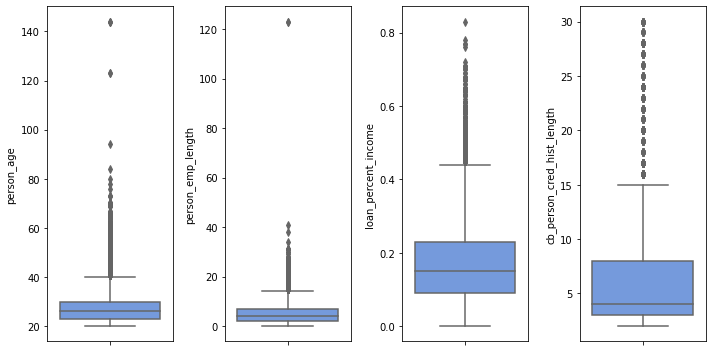

In [ ]:
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

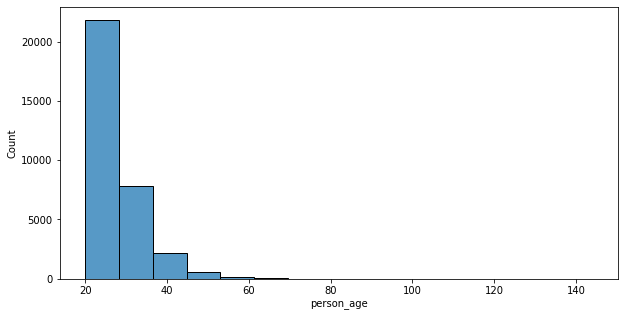

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x= 'person_age', bins=15)
plt.show()

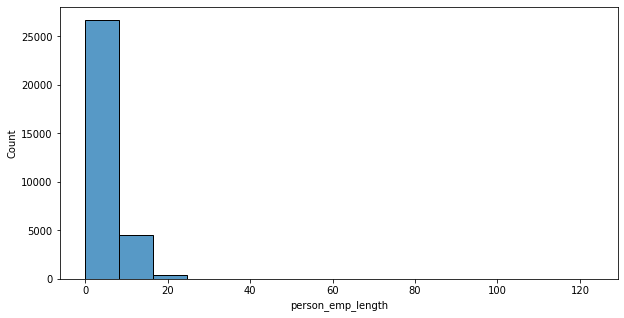

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x= 'person_emp_length', bins=15)
plt.show()

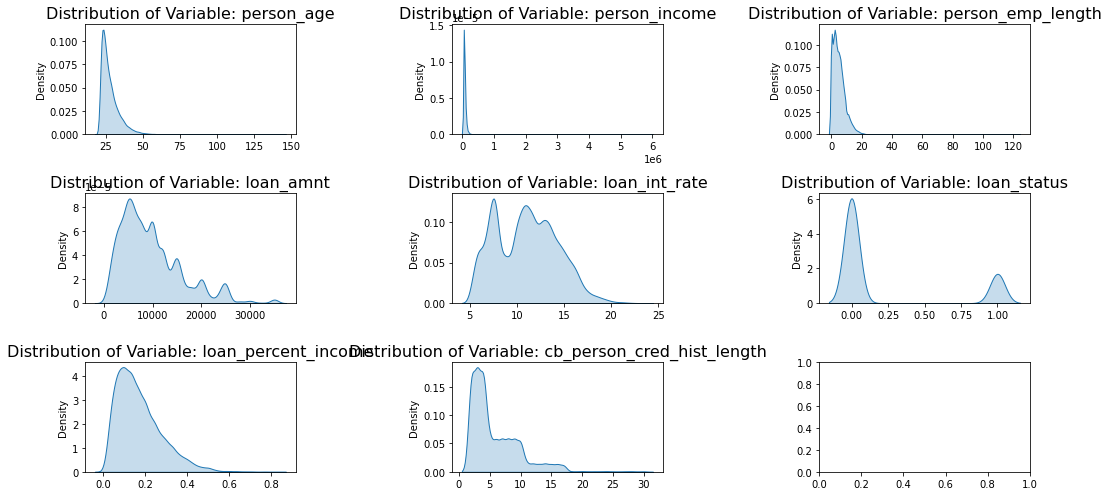

In [ ]:
df_num = df.select_dtypes(include='number')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  # array to 1D
cols = df_num.columns[:]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df_num  # select the data
    sns.kdeplot(data=df, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
# fig.delaxes(axes[5])  # delete the empty subplot
fig.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

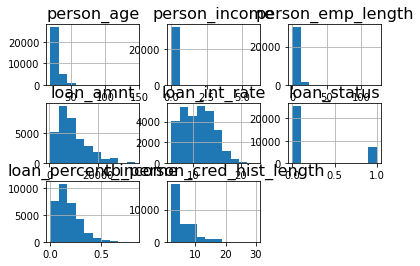

In [ ]:
plt.figure(figsize=(12,8))
df.hist()
plt.show()

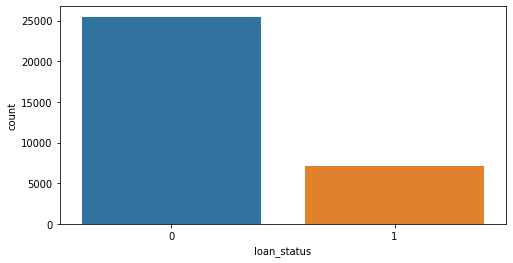

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='loan_status', data=df)
plt.show()

In [ ]:
variables = ['person_age','person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status','cb_person_default_on_file']
credit_risk_corr = df[variables].corr()
credit_risk_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.042411,0.859133,-0.021629
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.254471,0.117987,-0.144449
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.054111,0.144699,-0.082489
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.572612,0.041967,0.105376
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.120314,0.016696,0.335133
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,1.000000,-0.031690,0.379366
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.031690,1.000000,-0.015529
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,0.379366,-0.015529,1.000000


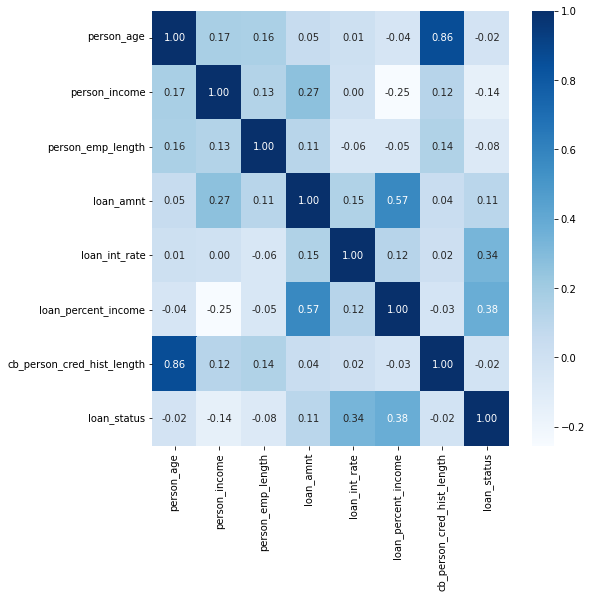

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(credit_risk_corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
pd.crosstab(index = df['loan_intent'], columns = df['loan_grade'], 
            normalize='index').round(4) * 100

loan_grade,A,B,C,D,E,F,G
loan_intent,,,,,,,
DEBTCONSOLIDATION,33.63,31.08,19.99,11.51,2.76,0.83,0.19
EDUCATION,33.69,31.40,21.01,10.18,2.87,0.71,0.14
HOMEIMPROVEMENT,31.23,30.93,19.22,13.51,3.97,0.89,0.25
MEDICAL,32.27,33.04,20.05,10.84,2.75,0.86,0.20
PERSONAL,33.18,32.84,18.95,11.65,2.66,0.54,0.18
VENTURE,33.80,32.72,19.30,10.16,3.11,0.66,0.24


In [ ]:
var_categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status']
for i in var_categorical:
    print(f'Total row of variable {i}')
    print(df[i].value_counts())
    print()

Total row of variable person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Total row of variable loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

Total row of variable loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Total row of variable loan_status
0    25473
1     7108
Name: loan_status, dtype: int64



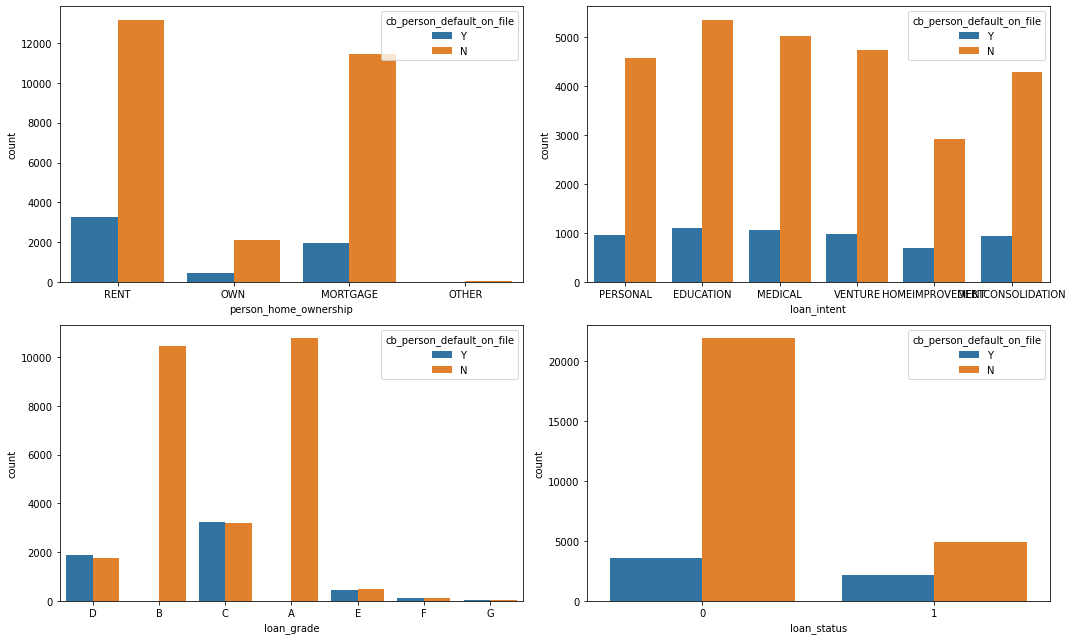

In [ ]:
#Analysing categorical variables with target
plt.figure(figsize=(15,9))
for i in range(0,len(var_categorical)):
    plt.subplot(2,2,i + 1)
    sns.countplot(data= df, x = var_categorical[i], hue='cb_person_default_on_file')
    plt.tight_layout()

In [ ]:
df['person_age'].sort_values(ascending=False).head(10)

81       144
32297    144
183      144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
Name: person_age, dtype: int64

In [ ]:
df.drop(df.loc[df['person_age'] >= 123].index, inplace=True)

In [ ]:
df.loc[df['person_age'] >= 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [ ]:
df['person_emp_length'].sort_values(ascending=False).head(10)

0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
31867     31.0
30914     31.0
31866     31.0
32263     31.0
32539     30.0
Name: person_emp_length, dtype: float64

In [ ]:
df.drop(df.loc[df['person_emp_length'] == 123].index, inplace=True)

In [ ]:
df.loc[df['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


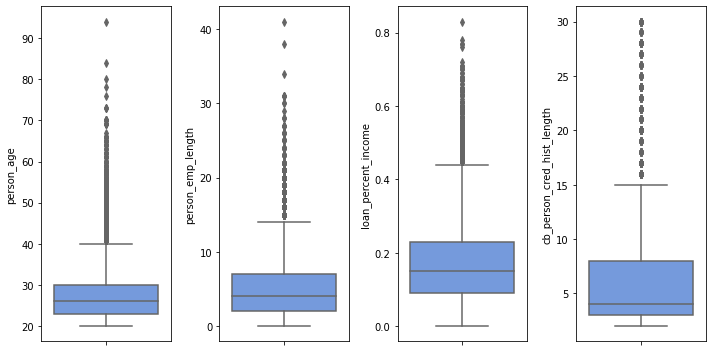

In [ ]:
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='CornflowerBlue', orient='v')
    plt.tight_layout()

In [ ]:
df.loc[df['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [ ]:
df.loc[df['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [ ]:
mean_person_emp_length = df['person_emp_length'].mean()

In [ ]:
# df['age_bins'] = pd.cut(x=df['person_age'], bins=[20, 30, 40, 59, 60, 70, 95])
# df.drop('age_bins',1,inplace=True)

In [ ]:
# df.groupby("age_bins")['person_emp_length'].mean()

In [ ]:
df.groupby("loan_grade")['loan_int_rate'].mean()

loan_grade
A     7.327732
B    10.995542
C    13.463649
D    15.361250
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [ ]:
df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length)

In [ ]:
def f(cols):
    loan_int_rate = cols[0]
    loan_grade = cols[1]
    
    if pd.isnull(loan_int_rate):

        if loan_grade == 'A':
            return 7.327732

        elif loan_grade == 'B':
            return 10.995542

        elif loan_grade == 'C':
            return 13.463649

        elif loan_grade == 'D':
            return 15.361250

        elif loan_grade == 'E':
            return 17.009455

        elif loan_grade == 'F':
            return 18.609159

        else:
            return 20.251525

    else:
        return loan_int_rate
    
df['loan_int_rate']=df[['loan_int_rate','loan_grade']].apply(f,axis=1)

In [ ]:
df.isna().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


## Encoding categorical variables to numeric

In [ ]:
df.select_dtypes('object').nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [ ]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace(['Y'],1)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].replace(['N'],0)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# enc=LabelEncoder()
# df['person_home_ownership']=enc.fit_transform(df['person_home_ownership'])
# df['loan_intent']=enc.fit_transform(df['loan_intent'])
# df['loan_grade']=enc.fit_transform(df['loan_grade'])

Checking the duplicates

In [ ]:
duplicateDFRow = df[df.duplicated()]
print(len(duplicateDFRow))

165


In [ ]:
df=df.drop_duplicates()

## WOE and IV

In [ ]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 5

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

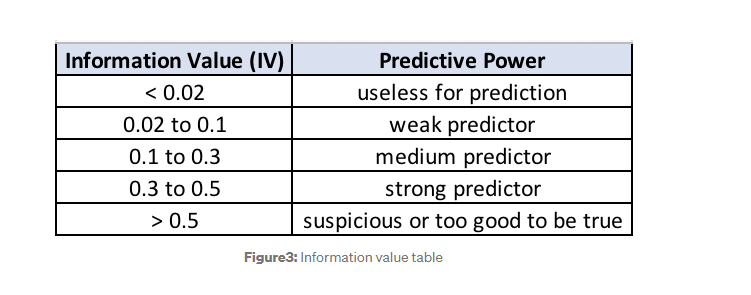

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000
mean,27.730754,6.589428e+04,4.782829,9592.486655,11.015968,0.218705,0.170248,0.176772,5.811194
std,6.210445,5.251787e+04,3.981709,6320.885127,3.220512,0.413374,0.106785,0.381481,4.057899
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.995542,0.000000,0.150000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.463649,0.000000,0.230000,0.000000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000


In [ ]:
final_iv, IV = data_vars(df,df.cb_person_default_on_file)
final_iv

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,person_age,20,23,8694,1505,0.173108,7189,0.826892,0.262699,0.269453,-0.025386,0.000413
1,person_age,24,26,9011,1580,0.175341,7431,0.824659,0.275790,0.278523,-0.009862,0.000413
2,person_age,27,30,6967,1246,0.178843,5721,0.821157,0.217490,0.214430,0.014168,0.000413
3,person_age,31,94,7737,1398,0.180690,6339,0.819310,0.244022,0.237594,0.026695,0.000413
4,person_income,4000,38500,8104,1583,0.195336,6521,0.804664,0.276313,0.244415,0.122667,0.005349
5,person_income,38556,55000,8188,1387,0.169394,6801,0.830606,0.242102,0.254910,-0.051553,0.005349
6,person_income,55004,79200,8018,1382,0.172362,6636,0.827638,0.241229,0.248726,-0.030604,0.005349
7,person_income,79272,2039784,8099,1377,0.170021,6722,0.829979,0.240356,0.251949,-0.047105,0.005349
8,person_home_ownership,MORTGAGE,MORTGAGE,13366,1988,0.148736,11378,0.851264,0.347006,0.426462,-0.206179,0.029714
9,person_home_ownership,OTHER,OTHER,106,29,0.273585,77,0.726415,0.005062,0.002886,0.561864,0.029714


In [ ]:
IV.sort_values(['IV'],ascending=0)

,VAR_NAME,IV
3,loan_int_rate,2.147767
2,loan_grade,1.236083
6,loan_status,0.192583
9,person_home_ownership,0.029714
1,loan_amnt,0.015545
5,loan_percent_income,0.010755
10,person_income,0.005349
8,person_emp_length,0.004738
4,loan_intent,0.001856
0,cb_person_cred_hist_length,0.000726


In [ ]:
df['loan_grade'] = df['loan_grade'].replace(['A','B','C','D','E','F','G'],['A','A','B','B','C','C','B'])
# df['person_home_ownership'] = df['person_home_ownership'].replace(['OWN','MORTGAGE','RENT','OTHER'],['A','A','B','C'])
df['loan_intent'] = df['loan_intent'].replace(['HOMEIMPROVEMENT','DEBTCONSOLIDATION','MEDICAL','PERSONAL','VENTURE','EDUCATION'],['C','C','B','B','B','A'])

In [ ]:
bins = [-0.1, 0.14,0.85]
labels = [0,1]
df['loan_percent_income'] = pd.cut(df['loan_percent_income'], bins, labels=labels)

bins = [-1, 2, 6, 45]
labels = ['Junior_emp','Mid_emp', 'Senr_emp']
df['person_emp_length'] = pd.cut(df['person_emp_length'], bins, labels=labels)

bins = [0, 5000,8000, 12250, 35000]
labels = ['Micro', 'Small', 'Medium', 'Large']
df['loan_amnt'] = pd.cut(df['loan_amnt'], bins, labels=labels)

bins = [5.4, 8,11,13.4, 23.22]
labels = ['5.4% - 8%', '8% - 11%', '11% - 13.4%', '13.4% - 23.2%']
df['loan_int_rate'] = pd.cut(df['loan_int_rate'], bins, labels=labels)

bins = [-1, 38500,55000, 79200, 3000000]
labels = ['Low-range', 'Med-range', 'High-range', 'V High-range']
df['person_income'] = pd.cut(df['person_income'], bins, labels=labels)

bins = [-1, 3,4,31]
labels = [1, 2, 3]
df['cb_person_cred_hist_length'] = pd.cut(df['cb_person_cred_hist_length'], bins, labels=labels)

# bins = [19, 23,26,30,95]
# labels = ['20-23', '23-26', '26-30', '30-95']
# df['person_age'] = pd.cut(df['person_age'], bins, labels=labels)

df.drop(['person_age','cb_person_cred_hist_length','person_emp_length','loan_intent'],1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
df=df.reset_index()
df.drop('index',1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# one_hot_encoded_data = pd.get_dummies(df, columns = ['loan_grade', 'person_income','person_emp_length','loan_int_rate','loan_amnt','person_home_ownership','cb_person_cred_hist_length','loan_intent'])
# one_hot_encoded_data

one_hot_encoded_data = pd.get_dummies(df, columns = ['loan_grade','person_income','loan_status','loan_int_rate','loan_amnt','person_home_ownership','loan_percent_income'])
one_hot_encoded_data

,cb_person_default_on_file,loan_grade_A,loan_grade_B,loan_grade_C,person_income_Low-range,person_income_Med-range,person_income_High-range,person_income_V High-range,loan_status_0,loan_status_1,...,loan_amnt_Micro,loan_amnt_Small,loan_amnt_Medium,loan_amnt_Large,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_percent_income_0,loan_percent_income_1
0,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
1,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
32405,0,1,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
32406,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
32407,0,1,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
for i in one_hot_encoded_data.columns:
  one_hot_encoded_data[i]=one_hot_encoded_data[i].astype(int)
  

In [ ]:
one_hot_encoded_data.columns

Index(['cb_person_default_on_file', 'loan_grade_A', 'loan_grade_B',
       'loan_grade_C', 'person_income_Low-range', 'person_income_Med-range',
       'person_income_High-range', 'person_income_V High-range',
       'loan_status_0', 'loan_status_1', 'loan_int_rate_5.4% - 8%',
       'loan_int_rate_8% - 11%', 'loan_int_rate_11% - 13.4%',
       'loan_int_rate_13.4% - 23.2%', 'loan_amnt_Micro', 'loan_amnt_Small',
       'loan_amnt_Medium', 'loan_amnt_Large', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_percent_income_0',
       'loan_percent_income_1'],
      dtype='object')

In [ ]:
one_hot_encoded_data.drop(['loan_amnt_Micro','person_income_V High-range','loan_status_1','loan_amnt_Large','loan_percent_income_1','person_home_ownership_RENT','loan_grade_A','loan_int_rate_13.4% - 23.2%'],1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32409 entries, 0 to 32408
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   cb_person_default_on_file       32409 non-null  int64
 1   loan_grade_B                    32409 non-null  int64
 2   loan_grade_C                    32409 non-null  int64
 3   person_income_Low-range         32409 non-null  int64
 4   person_income_Med-range         32409 non-null  int64
 5   person_income_High-range        32409 non-null  int64
 6   loan_status_0                   32409 non-null  int64
 7   loan_int_rate_5.4% - 8%         32409 non-null  int64
 8   loan_int_rate_8% - 11%          32409 non-null  int64
 9   loan_int_rate_11% - 13.4%       32409 non-null  int64
 10  loan_amnt_Small                 32409 non-null  int64
 11  loan_amnt_Medium                32409 non-null  int64
 12  person_home_ownership_MORTGAGE  32409 non-null  int64
 13  p

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = one_hot_encoded_data.iloc[:,:]
calc_vif(X)

,variables,VIF
0,cb_person_default_on_file,2.026320
1,loan_grade_B,3.515341
2,loan_grade_C,1.281057
3,person_income_Low-range,2.120907
4,person_income_Med-range,1.963797
5,person_income_High-range,1.864681
6,loan_status_0,5.428065
7,loan_int_rate_5.4% - 8%,3.837482
8,loan_int_rate_8% - 11%,3.205243
9,loan_int_rate_11% - 13.4%,2.066090


In [ ]:
df=one_hot_encoded_data.copy()

In [ ]:
defaulter = df.loc[df['cb_person_default_on_file'] == 1]
non_defaulter = df.loc[df['cb_person_default_on_file'] == 0]

In [ ]:
non_defaulter_train=non_defaulter.iloc[:20000,:]
non_defaulter_test=non_defaulter.iloc[20000:,:]

defaulter_train=defaulter.iloc[:3500,:]
defaulter_test=defaulter.iloc[3500:,:]

df=non_defaulter_train.append(defaulter_train)
test=non_defaulter_test.append(defaulter_test)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()

# lus=df.iloc[:,[1,6]].values
# cluster=sc.fit_transform(lus)

# final = pd.DataFrame(cluster)
# final = final.rename(columns = {0:"person_income",1:'loan_amnt'})
# df=df.reset_index()

# df.drop(['person_income','loan_amnt','index'],1,inplace=True)
# df=pd.concat([df,final],axis=1)

Used SMOTE since the dataset is imbalanced 

In [ ]:
X = df.drop(["cb_person_default_on_file"], axis = 1) 
Y = df["cb_person_default_on_file"]           
print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0))) 

Before OverSampling, counts of label '1': 3500
Before OverSampling, counts of label '0': 20000 



In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train, y_train = sm.fit_resample(X, Y.ravel())  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, counts of label '1': 20000
After OverSampling, counts of label '0': 20000


In [ ]:
x_test = test.drop(["cb_person_default_on_file"], axis = 1) 
y_test = test["cb_person_default_on_file"] 

x_train.shape, y_train.shape , x_test.shape, y_test.shape

((40000, 15), (40000,), (8909, 15), (8909,))

## Building different models

 ______________________________________________                                 
 
Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtt = DecisionTreeClassifier( criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, splitter='best')
#Params for train test split plus oversamp

dtt.fit(x_train, y_train)

y_pred = dtt.predict(x_test)
print("Decision Tree Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
100*(metrics.f1_score(y_test,y_pred,average="macro"))

Decision Tree Classifier model accuracy(in %): 83.7


81.52303340214728

Logistic Regression model F1 Score(in %): 81.77239749748854
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.61      1.00      0.76      2000

    accuracy                           0.84      8000
   macro avg       0.80      0.89      0.82      8000
weighted avg       0.90      0.84      0.85      8000

----------------------------------------------------------------------------------------------------
Accuracy Score : 0.838625
----------------------------------------------------------------------------------------------------


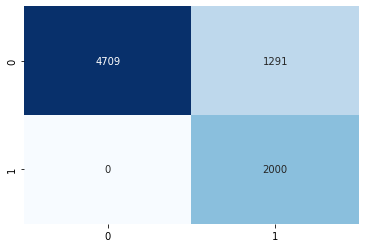

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
print("-"*100)
print(classification_report(y_test,y_pred))
print("-"*100)
print("Accuracy Score :", accuracy_score(y_test,y_pred))
print("-"*100)

In [ ]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 47.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=bf576c6ab51816ce3c001fa40c6aa0cb9e434083793773875f9607512db047a7
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
eli5.show_weights(dtt, top=-1, feature_names = X.columns.tolist())

Weight,Feature
0.6757,loan_grade_B
0.3134,loan_grade_C
0.0019,loan_amnt_Small
0.0017,person_income_Med-range
0.0011,loan_int_rate_8% - 11%
0.0011,loan_amnt_Medium
0.0010,person_home_ownership_OWN
0.0008,person_home_ownership_MORTGAGE
0.0006,loan_percent_income_0
0.0006,person_income_High-range


 ______________________________________________                                 
 
Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr2 = LogisticRegression(C = 0.1, max_iter = 300, penalty= 'l2', solver ='newton-cg')
lr2.fit(x_train, y_train)

y_pred = lr2.predict(x_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("F1 Score :",100*(metrics.f1_score(y_test,y_pred,average="macro")))

Logistic Regression model accuracy(in %): 83.8625
F1 Score : 81.77239749748854


In [ ]:
eli5.show_weights(lr2, top=-1, feature_names = X.columns.tolist())

 ______________________________________________                                 
 
Voting Classifier [CatBoost + LightGBM]

In [ ]:
! pip install catboost

from catboost import CatBoostClassifier

catt = CatBoostClassifier(learning_rate= 0.1, l2_leaf_reg = 5, iterations = 1000, depth= 2, border_count= 200)
#Best params for train test split plus oversampling

cat2 =  CatBoostClassifier(learning_rate = 0.13, l2_leaf_reg =  5, iterations = 100, depth = 8, border_count = 5)
#best params for direct training data as input for training the model, no oversamp or train test split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from lightgbm import LGBMClassifier 
lg = LGBMClassifier(n_estimators = 137, num_leaves= 329, max_depth =  5, learning_rate= 0.39983175225014567, min_child_samples= 45)

lg2 = LGBMClassifier(n_estimators = 234, num_leaves =  498, max_depth = 18, learning_rate = 0.38598673398420036, min_child_samples = 35)
#For training data as a whole as input + no oversamp or train test split

0:	learn: 0.4039195	total: 66.2ms	remaining: 1m 6s
1:	learn: 0.2390893	total: 78.6ms	remaining: 39.2s
2:	learn: 0.1467303	total: 83.8ms	remaining: 27.8s
3:	learn: 0.0943728	total: 88.9ms	remaining: 22.1s
4:	learn: 0.0641032	total: 94ms	remaining: 18.7s
5:	learn: 0.0460715	total: 98.8ms	remaining: 16.4s
6:	learn: 0.0349363	total: 104ms	remaining: 14.7s
7:	learn: 0.0277168	total: 108ms	remaining: 13.4s
8:	learn: 0.0229552	total: 113ms	remaining: 12.5s
9:	learn: 0.0201495	total: 117ms	remaining: 11.6s
10:	learn: 0.0178295	total: 122ms	remaining: 10.9s
11:	learn: 0.0164839	total: 126ms	remaining: 10.4s
12:	learn: 0.0151610	total: 130ms	remaining: 9.9s
13:	learn: 0.0142046	total: 135ms	remaining: 9.51s
14:	learn: 0.0136439	total: 139ms	remaining: 9.14s
15:	learn: 0.0131976	total: 143ms	remaining: 8.8s
16:	learn: 0.0128916	total: 148ms	remaining: 8.56s
17:	learn: 0.0124443	total: 153ms	remaining: 8.35s
18:	learn: 0.0121242	total: 158ms	remaining: 8.14s
19:	learn: 0.0118390	total: 163ms	remai

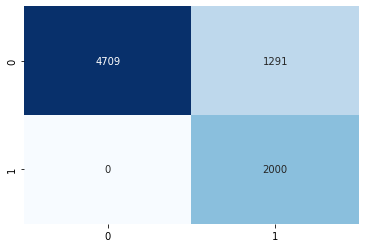

In [ ]:
from sklearn.ensemble import VotingClassifier

estimator = []  
estimator.append(('lg', lg2))
estimator.append(('cat', cat2))
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(x_train,y_train) 

y_pred = vot_hard.predict(x_test)

print("Voting model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("F1 Score :",100*(metrics.f1_score(y_test,y_pred,average="macro")))

## Score

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.61      1.00      0.76      2000

    accuracy                           0.84      8000
   macro avg       0.80      0.89      0.82      8000
weighted avg       0.90      0.84      0.85      8000

----------------------------------------------------------------------------------------------------
Accuracy Score : 0.838625
----------------------------------------------------------------------------------------------------


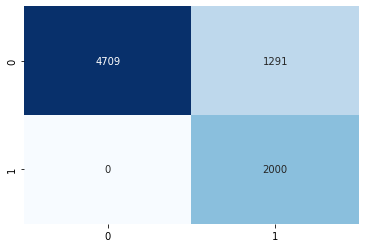

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
print("-"*100)
print(classification_report(y_test,y_pred))
print("-"*100)
print("Accuracy Score :", accuracy_score(y_test,y_pred))
print("-"*100)

+_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ +_+ 

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# print(random_grid)

# from sklearn.ensemble import RandomForestClassifier
# rfc=RandomForestClassifier()

# from sklearn.model_selection import GridSearchCV
# rf_Grid = GridSearchCV(estimator = rfc, param_grid = random_grid, cv = 10, verbose=2, n_jobs = 4)
# rf_Grid.fit(x_train, y_train)

# y_pred = rf_Grid.predict(x_test)

# print("Grid model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
# print("F1 Score :",100*(metrics.f1_score(y_test,y_pred,average="macro")))

In [ ]:
from xgboost.core     import XGBoostError
from lightgbm.sklearn import LightGBMError

def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
  try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X.values, Y.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
  except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X.values, Y.values.ravel())
        feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
        feat_imp['feature'] = X_train.columns
        feat_imp.sort_values(by='importance', ascending=False, inplace=True)
        feat_imp = feat_imp.iloc[:top_n]
        feat_imp.sort_values(by='importance', inplace=True)
        feat_imp = feat_imp.set_index('feature', drop=True)
        feat_imp.plot.barh(title=title, figsize=figsize)
        plt.xlabel('Feature Importance Score')
        plt.show()
        
        if print_table:
          from IPython.display import display
          print("Top {} features in descending order of importance".format(top_n))
          display(feat_imp.sort_values(by='importance', ascending=False))

        return feat_imp
  

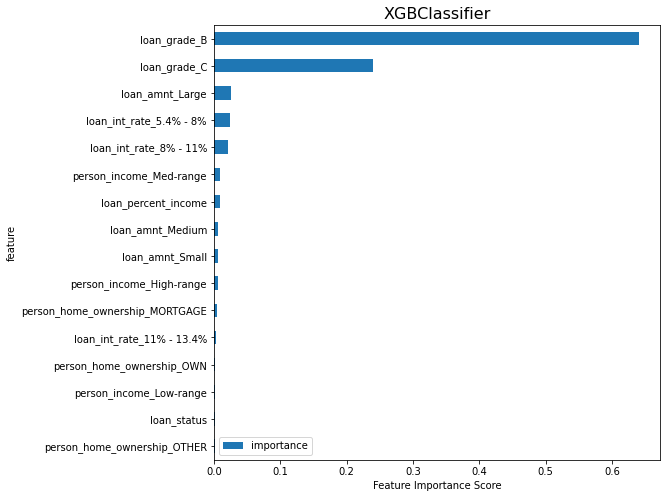

In [ ]:
from xgboost import XGBClassifier

clfs = [XGBClassifier()]

for clf in clfs:
    try:
        _ = plot_feature_importances(clf,X,Y, top_n=X.shape[1], title=clf.__class__.__name__)
    except AttributeError as e:
        print(e)